In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv('dfwithtitle.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              324 non-null    object
 1   BreachDate        324 non-null    object
 2   PwnCount          324 non-null    int64 
 3   DescriptionClean  324 non-null    object
 4   WebsiteLink       324 non-null    object
 5   IsVerified        324 non-null    bool  
 6   IsFabricated      324 non-null    bool  
 7   IsSensitive       324 non-null    bool  
 8   IsRetired         324 non-null    bool  
 9   IsSpamList        324 non-null    bool  
 10  IsMalware         324 non-null    bool  
 11  StatusCode        324 non-null    int64 
 12  Title             295 non-null    object
dtypes: bool(6), int64(2), object(5)
memory usage: 19.7+ KB


### 29 websites without a title

In [2]:
df['Title'].isnull().sum()

29

## Text Extraction and Cleanup

In [3]:
import re

def clean_text(text):
    
    if text !="":
        # Remove special characters replace them with spaces
        text = re.sub(r'[^\w\s]', '', text)

        # Remove apostrophes followed by "s" 
        text = re.sub(r"'s\b", '', text)
        
        # Remove non-English characters
        text = ''.join(idx for idx in text if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", idx))

        # Match any Russian characters using the Cyrillic script range
        russian_pattern = re.compile('[\u0400-\u04FF]+')
        
        # Replace the Russian characters with an empty string
        text = re.sub(russian_pattern, '', text)
        
        # Remove word that contains number
        text = re.sub(r'\w*\d\w*', '', text).strip()
        
        # Remove digits
        text = re.sub(r'[0-9]+', '', text)
        
        # Remove characters that are not a-z or A-Z
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        
        # Remove leading and trailing spaces and any remaining consecutive spaces
        text = re.sub(r'\s+', ' ', text.strip())
        
        return text
    else:
        return ""

### Clean Description column

In [4]:
df['DescriptionClean'] = df['DescriptionClean'].apply(lambda x: clean_text(x))
description_list = df['DescriptionClean'].tolist()
description_list

['In approximately March the free web hosting provider suffered a major data breach that exposed almost million customer records The data was sold and traded before was alerted in October The breach included names email addresses and plain text passwords',
 'In approximately its alleged that the Chinese email service known as suffered a data breach that impacted million subscribers Whilst there is evidence that the data is legitimate due to the difficulty of emphatically verifying the Chinese breach it has been flagged as unverified The data in the breach contains email addresses and plain text passwords Read more about Chinese data breaches in Have I Been Pwned',
 'In April customer data obtained from the streaming app known as appeared listed for sale on a Tor hidden service marketplace The data contained over million unique email addresses along with IP addresses usernames and passwords stored as unsalted hashes',
 'In February a massive collection of almost alleged data breaches wa

### Clean Title column

In [5]:
# Fill missing values in Title column with ''
df['Title'].fillna('', inplace=True)
df['Title'].isnull().sum()

0

In [6]:
df['TitleClean'] = df['Title'].apply(lambda x: clean_text(x))
title_list = df['TitleClean'].tolist()
title_list

['Troy Hunt Breaches traders plain text passwords ethical disclosure and',
 '',
 'Another Day Another Hack Millions of User Accounts for Streaming App',
 'Troy Hunt Ive Just Added New Data Breaches With Records To Have I Been Pwned',
 'Forums Motorforum',
 '',
 'Password security alert blog',
 'Abandonia',
 '',
 'Who Ran Leakedsourcecom Krebs on Security',
 'Everything about Acne Scars Acneorg',
 'Who owns this huge database of leaked VPN user details Comparitech',
 'Another decision makers database leaked Hacken',
 'Aditya Birla Fashion and Retail Ltd ABFRL Hacked All Data Leaked Online',
 'Troy Hunt Adobe credentials and the serious insecurity of password hints',
 'Hacking of adult website compromises users personal data BBC News',
 'adultfanfictionorg',
 'Agusiqtorrentspl Darmowe torrenty',
 '',
 '',
 'Data Breach',
 'Notorious Hacker Phineas Fisher Says He Hacked The Turkish Government',
 'Amart Furniture Warranty Customers Data Breach OzBargain Forums',
 'Online Android Forum Hack

## Text Pre-processing

In [7]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

# Function to process text, input is a list
def process_text(texts: list):
    
    processed = []
        
    for text in texts:
        
        # lowercase
        text = text.lower()

        #remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        #remove stopwords
        stop_words = set(stopwords.words('english'))

        #tokenize
        tokens = word_tokenize(text)
        new_text = [i for i in tokens if not i in stop_words]

        new_text = ' '.join(new_text)

        processed.append(new_text)    

    return processed

In [8]:
title = process_text(title_list)
title

['troy hunt breaches traders plain text passwords ethical disclosure',
 '',
 'another day another hack millions user accounts streaming app',
 'troy hunt ive added new data breaches records pwned',
 'forums motorforum',
 '',
 'password security alert blog',
 'abandonia',
 '',
 'ran leakedsourcecom krebs security',
 'everything acne scars acneorg',
 'owns huge database leaked vpn user details comparitech',
 'another decision makers database leaked hacken',
 'aditya birla fashion retail ltd abfrl hacked data leaked online',
 'troy hunt adobe credentials serious insecurity password hints',
 'hacking adult website compromises users personal data bbc news',
 'adultfanfictionorg',
 'agusiqtorrentspl darmowe torrenty',
 '',
 '',
 'data breach',
 'notorious hacker phineas fisher says hacked turkish government',
 'amart furniture warranty customers data breach ozbargain forums',
 'online android forum hacked user data accessed pcworld',
 'animal jam fun online animal game',
 '',
 'anime recomme

In [9]:
description = process_text(description_list)
description

['approximately march free web hosting provider suffered major data breach exposed almost million customer records data sold traded alerted october breach included names email addresses plain text passwords',
 'approximately alleged chinese email service known suffered data breach impacted million subscribers whilst evidence data legitimate due difficulty emphatically verifying chinese breach flagged unverified data breach contains email addresses plain text passwords read chinese data breaches pwned',
 'april customer data obtained streaming app known appeared listed sale tor hidden service marketplace data contained million unique email addresses along ip addresses usernames passwords stored unsalted hashes',
 'february massive collection almost alleged data breaches found online whilst data previously seen pwned files consisting million unique email addresses previously seen file contained email address plain text password consequently loaded single unverified data breach',
 'decemb

In [10]:
combined_text = ' '.join([text for text in title_list if text !='']) + ' '.join(description_list)

In [11]:
combined_text

'Troy Hunt Breaches traders plain text passwords ethical disclosure and Another Day Another Hack Millions of User Accounts for Streaming App Troy Hunt Ive Just Added New Data Breaches With Records To Have I Been Pwned Forums Motorforum Password security alert blog Abandonia Who Ran Leakedsourcecom Krebs on Security Everything about Acne Scars Acneorg Who owns this huge database of leaked VPN user details Comparitech Another decision makers database leaked Hacken Aditya Birla Fashion and Retail Ltd ABFRL Hacked All Data Leaked Online Troy Hunt Adobe credentials and the serious insecurity of password hints Hacking of adult website compromises users personal data BBC News adultfanfictionorg Agusiqtorrentspl Darmowe torrenty Data Breach Notorious Hacker Phineas Fisher Says He Hacked The Turkish Government Amart Furniture Warranty Customers Data Breach OzBargain Forums Online Android Forum Hacked User Data Accessed PCWorld Animal Jam Fun Online Animal Game Anime Recommendations Reviews Mang

In [12]:
def make_wordcloud(new_text):
    '''function to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(new_text) 

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

### Word cloud of both title and description text

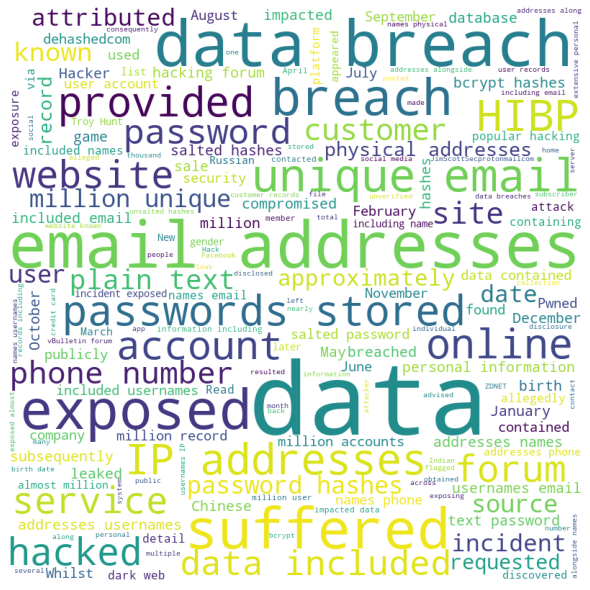

In [13]:
cloud = make_wordcloud(combined_text)

### Word cloud of description text

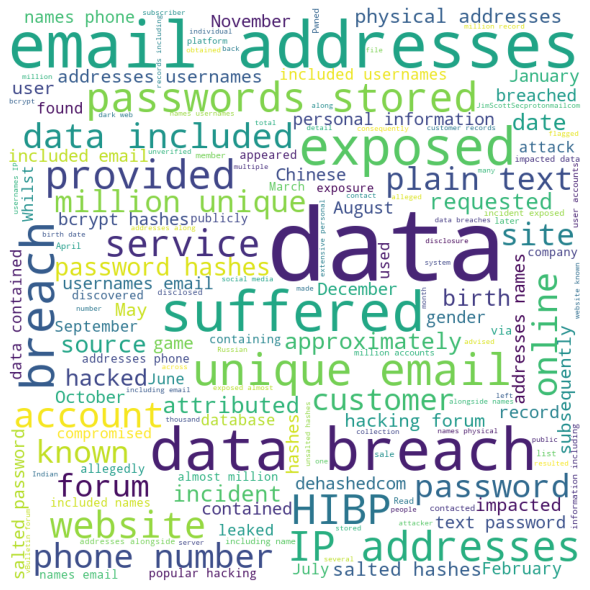

In [14]:
cloud = make_wordcloud(' '.join(description_list))

### Word cloud of title text

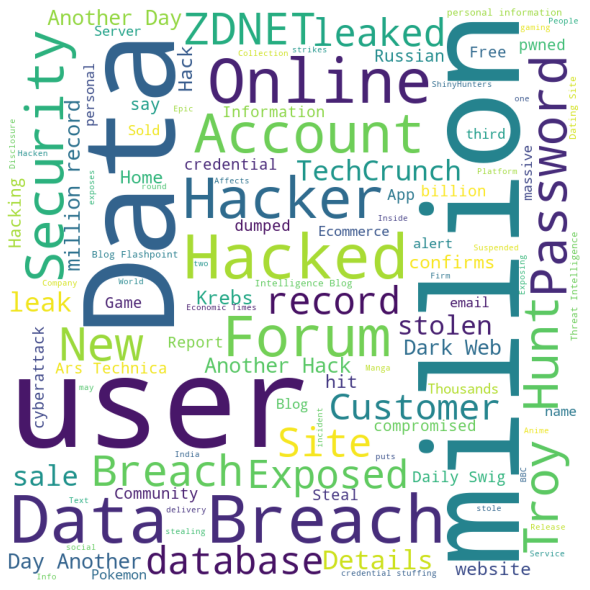

In [15]:
cloud = make_wordcloud(' '.join([text for text in title_list if text !='']))

In [16]:
df.head()

,Name,BreachDate,PwnCount,DescriptionClean,WebsiteLink,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,StatusCode,Title,TitleClean
0,000webhost,2015-03-01,14936670,In approximately March the free web hosting pr...,http://www.troyhunt.com/2015/10/breaches-trade...,True,False,False,False,False,False,200,"Troy Hunt: Breaches, traders, plain text passw...",Troy Hunt Breaches traders plain text password...
1,126,2012-01-01,6414191,In approximately its alleged that the Chinese ...,http://126.com,False,False,False,False,False,False,200,126网易免费邮-你的专业电子邮局,
2,17Media,2016-04-19,4009640,In April customer data obtained from the strea...,http://motherboard.vice.com/read/another-day-a...,True,False,False,False,False,False,200,"Another Day, Another Hack: Millions of User Ac...",Another Day Another Hack Millions of User Acco...
3,2844Breaches,2018-02-19,80115532,In February a massive collection of almost all...,https://www.troyhunt.com/ive-just-added-2844-n...,False,False,False,False,False,False,200,"Troy Hunt: I've Just Added 2,844 New Data Brea...",Troy Hunt Ive Just Added New Data Breaches Wit...
4,2fast4u,2017-12-20,17706,In December the Belgian motorcycle forum disco...,https://www.2fast4u.be,True,False,False,False,False,False,200,\r\n\t\t\r\n\t\t\t\r\n\t\t\tForums - \r\n\t\t\...,Forums Motorforum


In [17]:
text = df['DescriptionClean'][0]

## Cleaning Titles and Create bigrams, trigrams

Date: 2.6.2023

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv('dfwithtitle.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              324 non-null    object
 1   BreachDate        324 non-null    object
 2   PwnCount          324 non-null    int64 
 3   DescriptionClean  324 non-null    object
 4   WebsiteLink       324 non-null    object
 5   IsVerified        324 non-null    bool  
 6   IsFabricated      324 non-null    bool  
 7   IsSensitive       324 non-null    bool  
 8   IsRetired         324 non-null    bool  
 9   IsSpamList        324 non-null    bool  
 10  IsMalware         324 non-null    bool  
 11  StatusCode        324 non-null    int64 
 12  Title             295 non-null    object
dtypes: bool(6), int64(2), object(5)
memory usage: 19.7+ KB


In [42]:
df['Title'].isnull().sum()

29

### Create a function to expand text

In [43]:
import contractions

def expand_word(text):
    expanded_words = []  
    
    try:
        for word in text.split():
            # using contractions.fix to expand the shortened words
            expanded_words.append(contractions.fix(word))

        # Return expanded text
        return ' '.join(expanded_words)
    except AttributeError:
        return None

df['Title_Expanded'] = df['Title'].apply(lambda x: expand_word(x)) 

In [44]:
df['Title_Expanded'].isnull().sum()

29

In [45]:
df['Title_Expanded'].head()

0    Troy Hunt: Breaches, traders, plain text passw...
1                                    126网易免费邮-你的专业电子邮局
2    Another Day, Another Hack: Millions of User Ac...
3    Troy Hunt: I have Just Added 2,844 New Data Br...
4                     Forums - 2fast4u.be - Motorforum
Name: Title_Expanded, dtype: object

### Clean text

In [46]:
import re

def clean_text(text):
    
    try:
        # Remove special characters replace them with spaces
        text = re.sub(r'[^\w\s]', '', text)

        # Remove apostrophes followed by "s" 
        text = re.sub(r"'s\b", '', text)
        
        # Remove non-English characters
        text = ''.join(idx for idx in text if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", idx))

        # Match any Russian characters using the Cyrillic script range
        russian_pattern = re.compile('[\u0400-\u04FF]+')
        
        # Replace the Russian characters with an empty string
        text = re.sub(russian_pattern, '', text)
        
        # Remove word that contains number
        # text = re.sub(r'\w*\d\w*', '', text).strip()
        
        # Remove digits
        # text = re.sub(r'[0-9]+', '', text)
        
        # Remove characters that are not a-z or A-Z or 0-9
        text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
        
        # Remove leading and trailing spaces and any remaining consecutive spaces
        text = re.sub(r'\s+', ' ', text.strip())
        
        return text
    except TypeError:
        return ""

In [47]:
df['TitleClean'] = df['Title_Expanded'].apply(lambda x: clean_text(x))

In [48]:
df['TitleClean'].head()

0    Troy Hunt Breaches traders plain text password...
1                                                  126
2    Another Day Another Hack Millions of User Acco...
3    Troy Hunt I have Just Added 2844 New Data Brea...
4                          Forums 2fast4ube Motorforum
Name: TitleClean, dtype: object

In [49]:
df[df['TitleClean']==""].shape

(39, 15)

### Preprocess text with NLTK

In [50]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [51]:
# Ref: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

# Lemmatize with POS Tag
from nltk.corpus import wordnet
# nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [57]:
def preprocess(text):
    # split into sentences
    sentences = sent_tokenize(text)
    
    # split into words
    tokens = word_tokenize(text)
    
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic & remove Troy Hunt from some titles
    words = [word for word in stripped if word.isalpha() & (word != "troy") & (word != "hunt")]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # Lemmatise the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [58]:
df['Title_nltk'] = df['TitleClean'].apply(lambda x: preprocess(x))

In [59]:
df['Title_nltk'].head()

0    breach trader plain text password ethical disc...
1                                                     
2    another day another hack million user account ...
3                     add new data breach record pwned
4                                     forum motorforum
Name: Title_nltk, dtype: object

### Bigrams, Trigrams

In [60]:
from nltk.util import ngrams

def bigrams_convert(column, n=2):
    df['bigrams'+'_'+column]=df[column].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    
def trigrams_convert(column, n=3):
    df['trigrams'+'_'+column]=df[column].apply(lambda sentence: list(ngrams(sentence.split(), n)))

In [61]:
bigrams_convert('Title_nltk')
trigrams_convert('Title_nltk')

In [62]:
df.head()

,Name,BreachDate,PwnCount,DescriptionClean,WebsiteLink,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,StatusCode,Title,Title_Expanded,TitleClean,Title_nltk,bigrams_Title_nltk,trigrams_Title_nltk
0,000webhost,2015-03-01,14936670,"In approximately March 2015, the free web host...",http://www.troyhunt.com/2015/10/breaches-trade...,True,False,False,False,False,False,200,"Troy Hunt: Breaches, traders, plain text passw...","Troy Hunt: Breaches, traders, plain text passw...",Troy Hunt Breaches traders plain text password...,breach trader plain text password ethical disc...,"[(breach, trader), (trader, plain), (plain, te...","[(breach, trader, plain), (trader, plain, text..."
1,126,2012-01-01,6414191,"In approximately 2012, it's alleged that the C...",http://126.com,False,False,False,False,False,False,200,126网易免费邮-你的专业电子邮局,126网易免费邮-你的专业电子邮局,126,,[],[]
2,17Media,2016-04-19,4009640,"In April 2016, customer data obtained from the...",http://motherboard.vice.com/read/another-day-a...,True,False,False,False,False,False,200,"Another Day, Another Hack: Millions of User Ac...","Another Day, Another Hack: Millions of User Ac...",Another Day Another Hack Millions of User Acco...,another day another hack million user account ...,"[(another, day), (day, another), (another, hac...","[(another, day, another), (day, another, hack)..."
3,2844Breaches,2018-02-19,80115532,"In February 2018, a massive collection of almo...",https://www.troyhunt.com/ive-just-added-2844-n...,False,False,False,False,False,False,200,"Troy Hunt: I've Just Added 2,844 New Data Brea...","Troy Hunt: I have Just Added 2,844 New Data Br...",Troy Hunt I have Just Added 2844 New Data Brea...,add new data breach record pwned,"[(add, new), (new, data), (data, breach), (bre...","[(add, new, data), (new, data, breach), (data,..."
4,2fast4u,2017-12-20,17706,"In December 2017, the Belgian motorcycle forum...",https://www.2fast4u.be,True,False,False,False,False,False,200,\r\n\t\t\r\n\t\t\t\r\n\t\t\tForums - \r\n\t\t\...,Forums - 2fast4u.be - Motorforum,Forums 2fast4ube Motorforum,forum motorforum,"[(forum, motorforum)]",[]


#### Bigrams

In [63]:
from collections import Counter

bigrams = []
for row in df['bigrams_Title_nltk']:
    bigrams.extend(row)
    
print(f'Count of bigrams: {len(bigrams)}')
print("\n")
    
# Count the frequency of each bigram
bigram_frequency = Counter(bigrams)

# Print the frequency of each bigram
# for bigram, frequency in bigram_frequency.items():
#     print(bigram, frequency)
    
# Organize elements by frequency using most_common()
bigrams_organized_by_frequency = bigram_frequency.most_common()

# Print the elements organized by frequency
for element, frequency in bigrams_organized_by_frequency:
    print(element, frequency)

Count of bigrams: 1605


('data', 'breach') 38
('million', 'user') 12
('another', 'day') 9
('day', 'another') 9
('another', 'hack') 9
('user', 'data') 9
('dark', 'web') 9
('million', 'record') 9
('million', 'account') 9
('krebs', 'security') 8
('data', 'million') 8
('hack', 'million') 7
('user', 'account') 6
('data', 'leak') 6
('steal', 'million') 6
('forum', 'hack') 5
('ar', 'technica') 5
('user', 'record') 5
('daily', 'swig') 5
('personal', 'information') 4
('date', 'site') 4
('hacker', 'steal') 4
('threat', 'intelligence') 4
('intelligence', 'blog') 4
('blog', 'flashpoint') 4
('breach', 'techcrunch') 4
('hack', 'database') 4
('record', 'pwned') 3
('security', 'alert') 3
('database', 'leak') 3
('leak', 'online') 3
('user', 'personal') 3
('personal', 'data') 3
('bbc', 'news') 3
('hack', 'expose') 3
('credential', 'stuff') 3
('hack', 'krebs') 3
('expose', 'million') 3
('account', 'suspend') 3
('breach', 'expose') 3
('account', 'detail') 3
('breach', 'affect') 3
('site', 'hack') 3
('web

('hotel', 'guest') 1
('guest', 'post') 1
('post', 'hack') 1
('minehut', 'free') 1
('free', 'minecraft') 1
('minecraft', 'server') 1
('server', 'host') 1
('detail', 'data') 1
('breach', 'mrexcelcom') 1
('mrexcelcom', 'mrexcel') 1
('mrexcel', 'publishing') 1
('security', 'information') 1
('information', 'faq') 1
('myrepospacecom', 'sale') 1
('hacker', 'try') 1
('try', 'sell') 1
('sell', 'milllion') 1
('milllion', 'steal') 1
('steal', 'myspace') 1
('myspace', 'password') 1
('hacker', 'offer') 1
('offer', 'million') 1
('million', 'naughty') 1
('naughty', 'america') 1
('america', 'porn') 1
('account', 'mere') 1
('hack', 'ten') 1
('ten', 'million') 1
('million', 'neopets') 1
('neopets', 'account') 1
('lose', 'control') 1
('control', 'personal') 1
('data', 'include') 1
('include', 'netprospex') 1
('netprospex', 'record') 1
('forum', 'nextgenupdate') 1
('nvidia', 'say') 1
('say', 'employee') 1
('employee', 'credential') 1
('credential', 'proprietary') 1
('proprietary', 'information') 1
('infor

Bigram: data breach - Frequency: 38
Bigram: million user - Frequency: 12
Bigram: another day - Frequency: 9
Bigram: day another - Frequency: 9
Bigram: another hack - Frequency: 9
Bigram: user data - Frequency: 9
Bigram: dark web - Frequency: 9
Bigram: million record - Frequency: 9
Bigram: million account - Frequency: 9
Bigram: krebs security - Frequency: 8


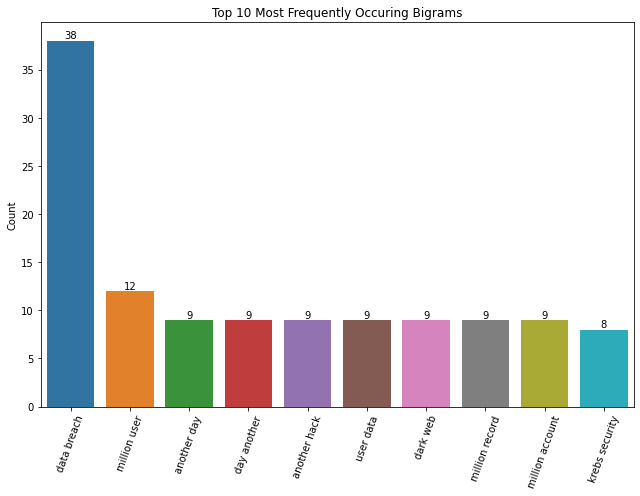

In [65]:
import seaborn as sns

bigrams_organized_by_frequency_10 = bigram_frequency.most_common(10)

# Print the elements organized by frequency
# print('Top 10 trigrams')
bi = []
freq = []

for element, frequency in bigrams_organized_by_frequency_10:
    bigram = ' '.join(element)
    print(f'Bigram: {bigram} - Frequency: {frequency}')
    bi.append(bigram)
    freq.append(frequency)


df_bi = pd.DataFrame({'Bigram': bi, 'Count': freq})

plt.figure(figsize=(9, 7))
ax = sns.barplot(x=df_bi['Bigram'].values, y=df_bi['Count'].values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel('Count')
plt.title('Top 10 Most Frequently Occuring Bigrams')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

#### Trigrams

In [67]:
trigrams = []
for row in df['trigrams_Title_nltk']:
    trigrams.extend(row)
    
print(f'Count of trigrams: {len(trigrams)}')
print("\n")
    
# Count the frequency of each trigram
trigram_frequency = Counter(trigrams)

# Organize elements by frequency using most_common()
trigrams_organized_by_frequency = trigram_frequency.most_common()

# Print the elements organized by frequency
for element, frequency in trigrams_organized_by_frequency:
    print(element, frequency)

Count of trigrams: 1341


('another', 'day', 'another') 9
('day', 'another', 'hack') 9
('hack', 'million', 'account') 5
('million', 'user', 'account') 4
('threat', 'intelligence', 'blog') 4
('intelligence', 'blog', 'flashpoint') 4
('another', 'hack', 'million') 3
('hack', 'krebs', 'security') 3
('hacker', 'steal', 'million') 3
('data', 'breach', 'expose') 3
('data', 'million', 'user') 3
('dark', 'web', 'zdnet') 3
('million', 'account', 'sell') 3
('account', 'sell', 'dark') 3
('sell', 'dark', 'web') 3
('hacker', 'stole', 'million') 3
('stole', 'million', 'record') 3
('million', 'record', 'strike') 3
('record', 'strike', 'steal') 3
('strike', 'steal', 'million') 3
('steal', 'million', 'techcrunch') 3
('hack', 'forum', 'zdnet') 3
('plain', 'text', 'password') 2
('hack', 'million', 'user') 2
('new', 'data', 'breach') 2
('hack', 'adult', 'website') 2
('password', 'reuse', 'credential') 2
('reuse', 'credential', 'stuff') 2
('credential', 'stuff', 'another') 2
('stuff', 'another', 'billion') 

('another', 'hack', 'fisting') 1
('hack', 'fisting', 'site') 1
('fisting', 'site', 'update') 1
('site', 'update', 'forum') 1
('update', 'forum', 'software') 1
('royal', 'enfield', 'expose') 1
('enfield', 'expose', 'personal') 1
('expose', 'personal', 'data') 1
('personal', 'data', 'customer') 1
('data', 'customer', 'january') 1
('customer', 'january', 'cyber') 1
('january', 'cyber', 'threat') 1
('cyber', 'threat', 'expert') 1
('russian', 'america', 'russian') 1
('america', 'russian', 'date') 1
('russian', 'date', 'russian') 1
('date', 'russian', 'news') 1
('russian', 'news', 'russian') 1
('news', 'russian', 'hat') 1
('russian', 'hat', 'russian') 1
('hat', 'russian', 'americacom') 1
('another', 'emarketing', 'database') 1
('emarketing', 'database', 'million') 1
('database', 'million', 'record') 1
('million', 'record', 'expose') 1
('shein', 'fashion', 'retailer') 1
('fashion', 'retailer', 'announces') 1
('retailer', 'announces', 'breach') 1
('announces', 'breach', 'affect') 1
('affect', 

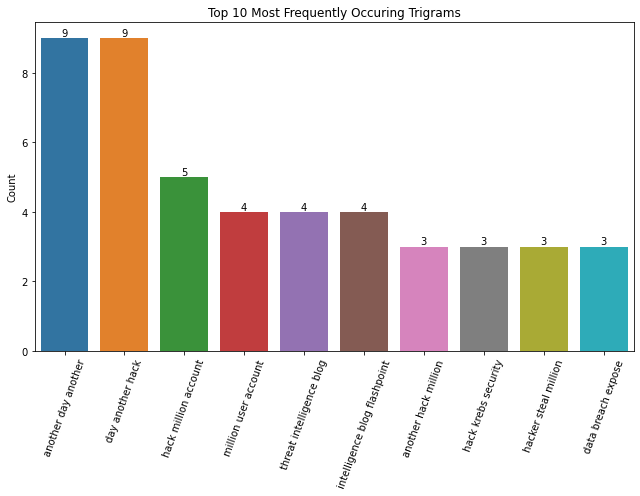

In [68]:
trigrams_organized_by_frequency_10 = trigram_frequency.most_common(10)

# Print the elements organized by frequency
# print('Top 10 trigrams')
tri = []
freq = []

for element, frequency in trigrams_organized_by_frequency_10:
    trigram = ' '.join(element)
#     print(f'Trigram: {trigram} - Frequency: {frequency}')
    tri.append(trigram)
    freq.append(frequency)
    
df_tri = pd.DataFrame({'Trigram': tri, 'Count': freq})

plt.figure(figsize=(9, 7))
ax = sns.barplot(x=df_tri['Trigram'].values, y=df_tri['Count'].values)

# Display the count on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel('Count')
plt.title('Top 10 Most Frequently Occuring Trigrams')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()